In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sys, os, glob
import datetime

In [109]:
folder_path = 'p_yaw_filtered'
depth_control = False

try:	#else already exists
    plot_path = folder_path + "_plot"
    os.makedirs(plot_path)
except:
    pass

In [48]:
mav_state_df = pd.read_csv(folder_path + "/_slash_br4_slash_mavros_slash_state.csv")
mav_state_df = mav_state_df[["rosbagTimestamp", "mode", "armed", "guided"]]
mav_state_df["rosbagTimestamp"] = mav_state_df["rosbagTimestamp"].apply(
    lambda x: datetime.datetime.utcfromtimestamp(x // 1000000000) + datetime.timedelta(microseconds=x % 1000000000/1000))

In [49]:
mav_state_extract_df = mav_state_df[mav_state_df["armed"] == True]
timestamps = mav_state_extract_df['rosbagTimestamp']

start_time = timestamps.iloc[0]
end_time = timestamps.iloc[-1]

In [50]:
depth_df = pd.read_csv(folder_path + "/_slash_br4_slash_depth_slash_state.csv")
depth_df.columns = ["rosbagTimestamp", "depth"]
depth_df["rosbagTimestamp"] = depth_df["rosbagTimestamp"].apply(
    lambda x: datetime.datetime.utcfromtimestamp(x // 1000000000) + datetime.timedelta(microseconds=x % 1000000000/1000))

In [51]:
depth_extract_df = depth_df[ depth_df["rosbagTimestamp"] >= start_time][depth_df["rosbagTimestamp"] <= end_time]

/tmp/ipykernel_7963/2065684116.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  depth_extract_df = depth_df[ depth_df["rosbagTimestamp"] >= start_time][depth_df["rosbagTimestamp"] <= end_time]


In [52]:
dist_df = pd.read_csv(folder_path + "/_slash_br4_slash_robot_distance.csv")
dist_df.columns = ["rosbagTimestamp", "dist"]
dist_df["dist"] = dist_df["dist"]/1000 # Converting to meters
dist_df["rosbagTimestamp"] = dist_df["rosbagTimestamp"].apply(
    lambda x: datetime.datetime.utcfromtimestamp(x // 1000000000) + datetime.timedelta(microseconds=x % 1000000000/1000))

In [53]:
dist_extract_df = dist_df[ dist_df["rosbagTimestamp"] >= start_time][dist_df["rosbagTimestamp"] <= end_time]

/tmp/ipykernel_7963/293370657.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dist_extract_df = dist_df[ dist_df["rosbagTimestamp"] >= start_time][dist_df["rosbagTimestamp"] <= end_time]


In [54]:
ang_deg_df = pd.read_csv(folder_path + "/_slash_br4_slash_angle_degree.csv")
ang_deg_df = ang_deg_df[["rosbagTimestamp", "x.1", "y.1", "z.1"]]
ang_deg_df.columns = ["rosbagTimestamp", "x", "y", "z"]
ang_deg_df["rosbagTimestamp"] = ang_deg_df["rosbagTimestamp"].apply(
    lambda x: datetime.datetime.utcfromtimestamp(x // 1000000000) + datetime.timedelta(microseconds=x % 1000000000/1000))

In [55]:
ang_deg_extract_df = ang_deg_df[ ang_deg_df["rosbagTimestamp"] >= start_time][ang_deg_df["rosbagTimestamp"] <= end_time]

In [56]:
ang_vel_df = pd.read_csv(folder_path + "/_slash_br4_slash_angular_velocity.csv")
ang_vel_df = ang_vel_df[["rosbagTimestamp", "x.1", "y.1", "z.1"]]
ang_vel_df.columns = ["rosbagTimestamp", "x", "y", "z"]
ang_vel_df["rosbagTimestamp"] = ang_vel_df["rosbagTimestamp"].apply(
    lambda x: datetime.datetime.utcfromtimestamp(x // 1000000000) + datetime.timedelta(microseconds=x % 1000000000/1000))

In [57]:
ang_vel_extract_df = ang_vel_df[ ang_vel_df["rosbagTimestamp"] >= start_time][ang_vel_df["rosbagTimestamp"] <= end_time]

In [58]:
thrust_df = pd.read_csv(folder_path + "/_slash_br4_slash_mavros_slash_rc_slash_override.csv")
thrust_df["heave"] = thrust_df['channels'].apply(lambda x: int(x.strip("[]").split(",")[2]))
thrust_df["yaw"] = thrust_df['channels'].apply(lambda x: int(x.strip("[]").split(",")[3]))
thrust_df["surge"] = thrust_df['channels'].apply(lambda x: int(x.strip("[]").split(",")[4]))
thrust_df["sway"] = thrust_df['channels'].apply(lambda x: int(x.strip("[]").split(",")[5]))
thrust_df.drop("channels", axis = 1, inplace = True)
thrust_df["rosbagTimestamp"] = thrust_df["rosbagTimestamp"].apply(
    lambda x: datetime.datetime.utcfromtimestamp(x // 1000000000) + datetime.timedelta(microseconds=x % 1000000000/1000))

In [59]:
thrust_extract_df = thrust_df[ thrust_df["rosbagTimestamp"] >= start_time][thrust_df["rosbagTimestamp"] <= end_time]

/tmp/ipykernel_7963/333526217.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  thrust_extract_df = thrust_df[ thrust_df["rosbagTimestamp"] >= start_time][thrust_df["rosbagTimestamp"] <= end_time]


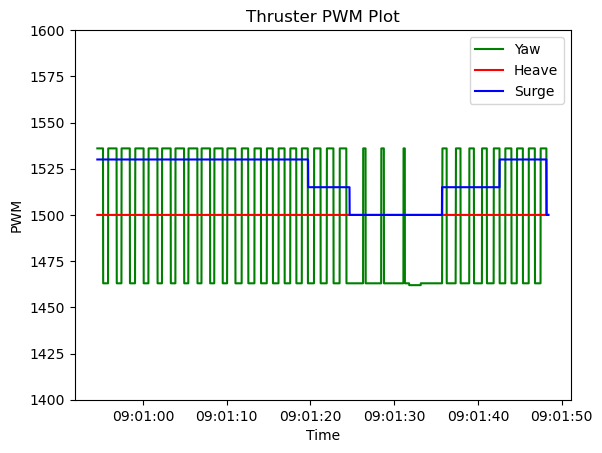

In [102]:
plt.figure()

plt.plot( thrust_extract_df["rosbagTimestamp"], thrust_extract_df["yaw"], '-g', thrust_extract_df["rosbagTimestamp"], thrust_extract_df["heave"], '-r',
         thrust_extract_df["rosbagTimestamp"], thrust_extract_df["surge"], '-b')
plt.ylim([ 1400, 1600 ])

plt.legend(["Yaw", "Heave", "Surge"])
plt.title("Thruster PWM Plot")
plt.xlabel("Time")
plt.ylabel("PWM")

plt.savefig(plot_path + "/thruster_plot_with_yaw.png")


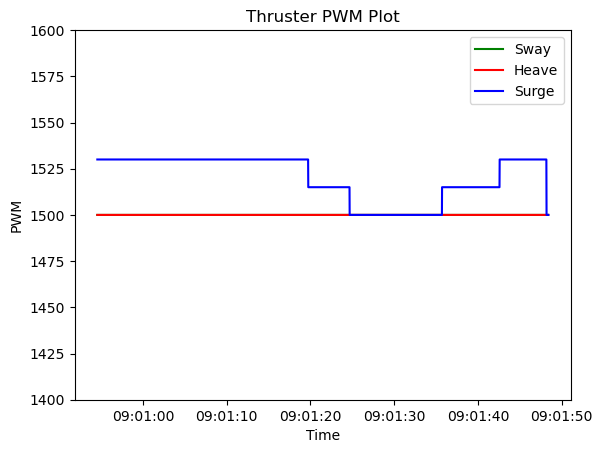

In [103]:
plt.figure()

plt.plot( thrust_extract_df["rosbagTimestamp"], thrust_extract_df["sway"], '-g', thrust_extract_df["rosbagTimestamp"], thrust_extract_df["heave"], '-r',
         thrust_extract_df["rosbagTimestamp"], thrust_extract_df["surge"], '-b')
plt.ylim([ 1400, 1600 ])

plt.legend(["Sway", "Heave", "Surge"])
plt.title("Thruster PWM Plot")
plt.xlabel("Time")
plt.ylabel("PWM")

plt.savefig(plot_path + "/thruster_plot_with_sway.png")

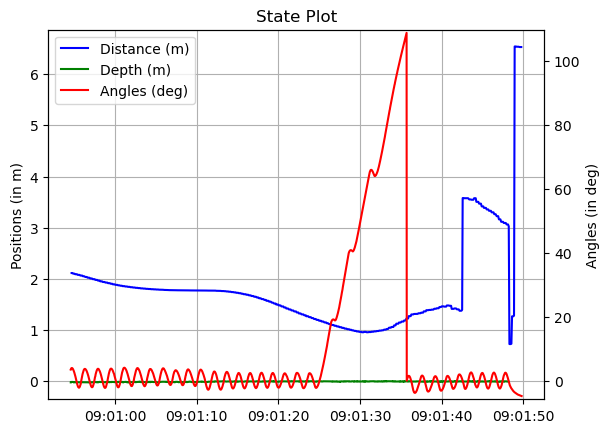

In [100]:
plt.figure()

ax1 = plt.subplot()
plot1, = ax1.plot(dist_extract_df["rosbagTimestamp"], dist_extract_df["dist"], '-b')
plot2, = ax1.plot(depth_extract_df["rosbagTimestamp"], depth_extract_df["depth"], '-g')
ax1.set_ylabel("Positions (in m)")
ax1.grid()

ax2 = ax1.twinx()
plot3, = ax2.plot( ang_deg_extract_df["rosbagTimestamp"], ang_deg_extract_df["z"], '-r')
ax2.set_ylim([np.min(ang_deg_extract_df["z"])-1, np.max(ang_deg_extract_df["z"])+1])
ax2.set_ylabel("Angles (in deg)")


plt.legend([plot1, plot2, plot3], ["Distance (m)", "Depth (m)", "Angles (deg)"])

plt.title("State Plot")
plt.xlabel("Time")

plt.savefig(plot_path + "/states.png")

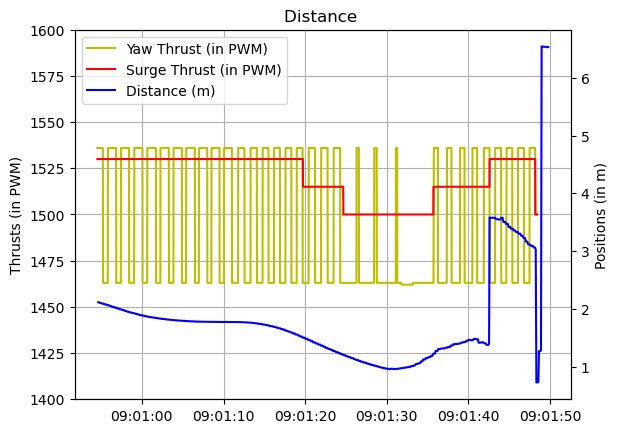

In [113]:
plt.figure()

ax1 = plt.subplot()
plot1, = ax1.plot(thrust_extract_df["rosbagTimestamp"], thrust_extract_df["yaw"], '-y')
plot2, = ax1.plot(thrust_extract_df["rosbagTimestamp"], thrust_extract_df["surge"], '-r')
if depth_control:
    plot3, = ax1.plot(thrust_extract_df["rosbagTimestamp"], thrust_extract_df["heave"], '-k')
ax1.set_ylim([1400, 1600])
ax1.set_ylabel("Thrusts (in PWM)")
ax1.grid()

ax2 = ax1.twinx()
plot4, = ax2.plot(dist_extract_df["rosbagTimestamp"], dist_extract_df["dist"], '-b')
if depth_control:
    plot5, = ax2.plot(depth_extract_df["rosbagTimestamp"], depth_extract_df["depth"], '-g')
ax2.set_ylabel("Positions (in m)")
ax2.grid(axis='x')


if depth_control:
    plt.legend([plot1, plot2, plot3, plot4, plot5], ["Yaw Thrust (in PWM)", "Surge Thrust (in PWM)", "Heave Thrust (in PWM)",
                                                     "Distance (m)", "Depth (m)"])
else:
    plt.legend([plot1, plot2, plot4], ["Yaw Thrust (in PWM)", "Surge Thrust (in PWM)", "Distance (m)"])

plt.title("Free Path Search with Yaw ")
plt.xlabel("Time")

plt.savefig(plot_path + "/free_path_yaw.png")

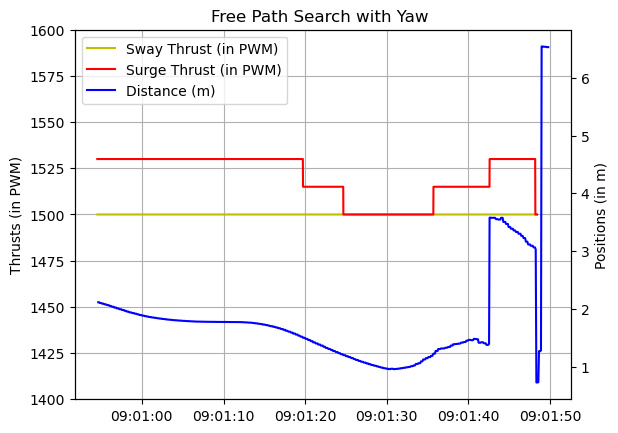

In [114]:
plt.figure()

ax1 = plt.subplot()
plot1, = ax1.plot(thrust_extract_df["rosbagTimestamp"], thrust_extract_df["sway"], '-y')
plot2, = ax1.plot(thrust_extract_df["rosbagTimestamp"], thrust_extract_df["surge"], '-r')
if depth_control:
    plot3, = ax1.plot(thrust_extract_df["rosbagTimestamp"], thrust_extract_df["heave"], '-k')
ax1.set_ylim([1400, 1600])
ax1.set_ylabel("Thrusts (in PWM)")
ax1.grid()

ax2 = ax1.twinx()
plot4, = ax2.plot(dist_extract_df["rosbagTimestamp"], dist_extract_df["dist"], '-b')
if depth_control:
    plot5, = ax2.plot(depth_extract_df["rosbagTimestamp"], depth_extract_df["depth"], '-g')
ax2.set_ylabel("Positions (in m)")
ax2.grid(axis='x')


if depth_control:
    plt.legend([plot1, plot2, plot3, plot4, plot5], ["Sway Thrust (in PWM)", "Surge Thrust (in PWM)", "Heave Thrust (in PWM)",
                                                     "Distance (m)", "Depth (m)"])
else:
    plt.legend([plot1, plot2, plot4], ["Sway Thrust (in PWM)", "Surge Thrust (in PWM)", "Distance (m)"])

plt.title("Free Path Search with Yaw ")
plt.xlabel("Time")

plt.savefig(plot_path + "/free_path_sway.png")

In [ ]:
plt.figure()

plt.plot( ang_deg_extract_df["rosbagTimestamp"], ang_deg_extract_df["z"], '-r')
plt.ylim([-180, 180])

plt.title("Yaw Angle Plot")
plt.xlabel("Time")
plt.ylabel("Angle (in Deg)")

plt.savefig(plot_path + "/yaw_plot.png")

In [ ]:
plt.figure()

plt.plot( ang_vel_df["rosbagTimestamp"], ang_vel_df["z"], '-r')

plt.title("Yaw Angular Rate Plot")
plt.xlabel("Time")
plt.ylabel("Angle (in Deg)")

plt.savefig(plot_path + "/yaw_rate_plot.png")

In [ ]:
plt.figure()

plt.plot( ang_vel_df["rosbagTimestamp"], ang_vel_df["z"], '-r')

plt.title("Yaw Angular Rate Plot")
plt.xlabel("Time")
plt.ylabel("Angle (in Deg)")

plt.savefig(plot_path + "/yaw_rate_plot.png")

In [ ]:
# create a figure with a 2x2 subplot layout
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

# plot something in each subplot
axs[0, 0].plot( thrust_extract_df["rosbagTimestamp"], thrust_extract_df["heave"], '-r', thrust_extract_df["rosbagTimestamp"], thrust_extract_df["yaw"], '-g')
axs[0, 0].set_ylim([1100, 1900])
axs[0, 0].legend(["Heave", "Yaw"])
axs[0, 0].set_title("Thruster PWM Plot")
axs[0, 0].set_xlabel("Time")
axs[0, 0].set_ylabel("PWM")

axs[0, 1].plot( ang_deg_extract_df["rosbagTimestamp"], ang_deg_extract_df["z"], '-r')
axs[0, 1].set_ylim([-180, 180])
axs[0, 1].set_title("Yaw Angle Plot")
axs[0, 1].set_xlabel("Time")
axs[0, 1].set_ylabel("Angle (in Deg)")

axs[1, 0].plot( ang_vel_df["rosbagTimestamp"], ang_vel_df["z"], '-r')
axs[1, 0].set_title("Yaw Angular Rate Plot")
axs[1, 0].set_xlabel("Time")
axs[1, 0].set_ylabel("Angle (in Deg)")

# axs[1, 1].plot( ang_vel_df["rosbagTimestamp"], ang_vel_df["z"], '-r')


fig.suptitle('BlueROV Plots')
plt.tight_layout()


plt.savefig(plot_path + "/combined_plot.png")